## Importing libraries

In [1]:
import  zipfile
import glob
import pandas as pd
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
import matplotlib

## Unzipping the data file

In [2]:
'''
# specifying the zip file name 
file_name = "../../youtube_text_classification/data/Dataset.zip"
import  zipfile
# opening the zip file in READ mode 
with zipfile.ZipFile(file_name, 'r') as zip: 
	# printing all the contents of the zip file 
	zip.printdir() 
	# extracting all the files 
	print('Extracting all the files now...') 
	zip.extractall() 
	print('Done!')

'''

'\n# specifying the zip file name \nfile_name = "../../youtube_text_classification/data/Dataset.zip"\nimport  zipfile\n# opening the zip file in READ mode \nwith zipfile.ZipFile(file_name, \'r\') as zip: \n\t# printing all the contents of the zip file \n\tzip.printdir() \n\t# extracting all the files \n\tprint(\'Extracting all the files now...\') \n\tzip.extractall() \n\tprint(\'Done!\')\n\n'

## Reading the database


In [5]:
files = glob.glob('/workspaces/youtube_text_classification/data/youtube-dataset/*.csv')
files

['/workspaces/youtube_text_classification/data/youtube-dataset/Youtube05.csv',
 '/workspaces/youtube_text_classification/data/youtube-dataset/Youtube01.csv',
 '/workspaces/youtube_text_classification/data/youtube-dataset/Youtube03.csv',
 '/workspaces/youtube_text_classification/data/youtube-dataset/Youtube02.csv',
 '/workspaces/youtube_text_classification/data/youtube-dataset/Youtube04.csv']

## Creating a dataframe from the files

In [7]:
all_df = []
for i in files:
    all_df.append(pd.read_csv(i).drop(['COMMENT_ID','AUTHOR','DATE'], axis = 1))

data = pd.concat(all_df, axis = 0 , ignore_index = True)
data

,CONTENT,CLASS
0,Nice song﻿,0
1,I love song ﻿,0
2,I love song ﻿,0
3,"860,000,000 lets make it first female to reach...",0
4,shakira is best for worldcup﻿,0
...,...,...
1950,SUBSCRIBE TO MY CHANNEL X PLEASE!. SPARE,1
1951,Check out my videos guy! :) Hope you guys had ...,1
1952,3 yrs ago I had a health scare but thankfully ...,1
1953,Rihanna looks so beautiful with red hair ;)﻿,0


### Checking for nulls 

In [11]:
data.isnull(
).sum()

CONTENT    0
CLASS      0
dtype: int64

### Verifying imbalance

In [12]:
data['CLASS'].value_counts()

1    1004
0     951
Name: CLASS, dtype: int64

## Tokenizing Youtube Comments


In [8]:
features = data['CONTENT']
target  = data['CLASS']

x_train, x_test , y_train, y_test =  train_test_split( features,
                                                       target, 
                                                       test_size = 0.2,
                                                       random_state = 42,
                                                       stratify = target)
vectorizer = CountVectorizer()

x_train_transf = vectorizer.fit_transform(x_train)
x_test_transf = vectorizer.transform(x_test)

x_train_transf.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [9]:
x_train_transf.shape

(1564, 3790)

## Performing the classification

In [10]:
clf = MultinomialNB()

clf.fit(x_train_transf, y_train)

MultinomialNB()

## Performing the evaluation on the test dataset

In [11]:
y_test_pred = clf.predict(x_test_transf)

In [12]:
y_test_pred 

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,

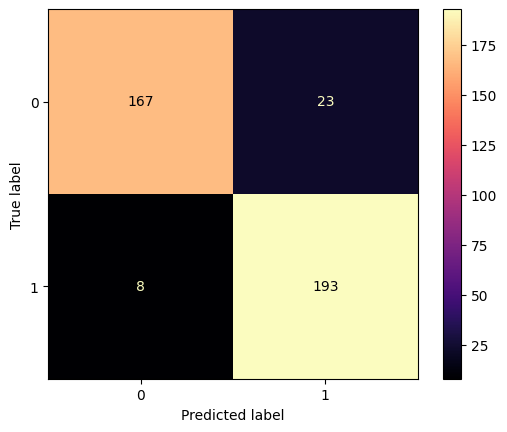

In [13]:
ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred,
    labels = clf.classes_,
    cmap = 'magma'
)

In [14]:
print(classification_report(y_test, y_test_pred, target_names = ['Ham', 'Spam']))

              precision    recall  f1-score   support

         Ham       0.95      0.88      0.92       190
        Spam       0.89      0.96      0.93       201

    accuracy                           0.92       391
   macro avg       0.92      0.92      0.92       391
weighted avg       0.92      0.92      0.92       391

